In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
f_max = "max_state_50ms_single_core.npy"
f_min = "min_state_50ms_single_core.npy"
f_dist = "bucket_counts_50ms_single_core.npy"
val_labels = ["BMPKI", "IPC", "CMPKI", "DAPKI", "Celsius", "Watts", "KHz"]
maxs = np.load(f_max)
mins = np.load(f_min)
dist = np.load(f_dist)

In [3]:
print("\t\tmax\t\tmin")
for i in range(len(val_labels)):
    print("{}\t\t{:.2f}\t\t{}".format(val_labels[i], maxs[i], mins[i]))

		max		min
BMPKI		371.17		0.14186071026558908
IPC		2.86		0.00123081
CMPKI		227.49		0.008766773045736375
DAPKI		59691.19		8.39639654970369
Celsius		96.00		48.0
Watts		3.71		0.125081
KHz		2000000.00		200000.0


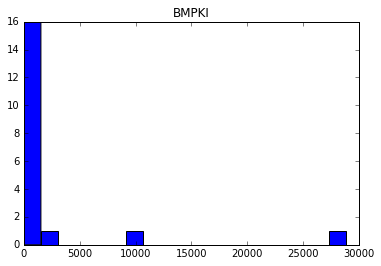

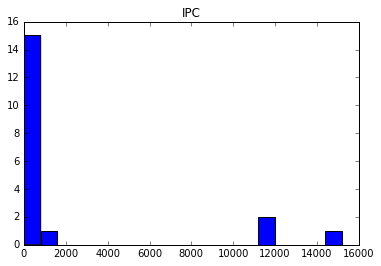

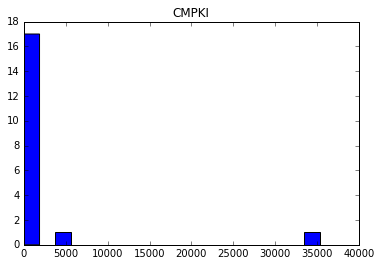

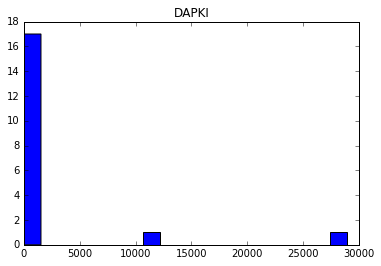

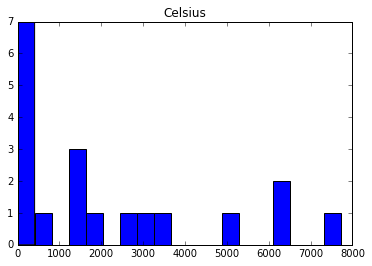

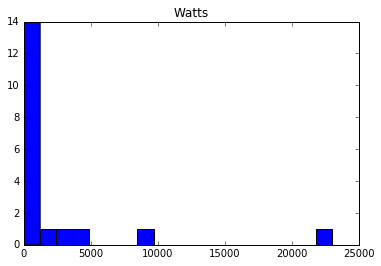

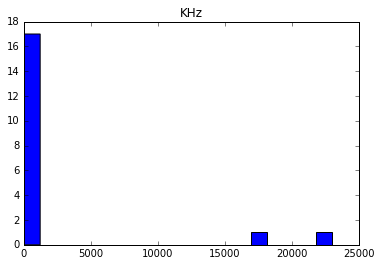

In [4]:
for i in range(len(dist)):
    plt.hist(dist[i], bins=len(dist[i]))
    plt.title(val_labels[i])
    plt.show()

In [5]:
raw_data = np.load("raw.npy")
raw_data

array([[  1.92842638e+01,   2.74794000e-01,   3.50080424e+00, ...,
          6.20000000e+01,   2.52624000e-01,   2.00000000e+05],
       [  2.07080402e+01,   2.03689000e-01,   2.73799763e+00, ...,
          6.20000000e+01,   2.52624000e-01,   2.00000000e+05],
       [  2.17905435e+01,   6.32981000e-02,   4.11386756e+00, ...,
          6.20000000e+01,   2.52624000e-01,   2.00000000e+05],
       ..., 
       [  2.15362527e+01,   1.62981000e-03,   3.17214890e+00, ...,
          6.70000000e+01,   1.22943800e+00,   2.00000000e+06],
       [  2.28968298e+01,   1.33905000e-03,   3.25603973e+00, ...,
          6.70000000e+01,   1.22943800e+00,   2.00000000e+06],
       [  8.65208508e+00,   4.25331000e-03,   1.44358159e+00, ...,
          6.70000000e+01,   1.22943800e+00,   2.00000000e+06]])

In [6]:
data = pd.DataFrame(raw_data)
data.columns=val_labels
data.head()

,BMPKI,IPC,CMPKI,DAPKI,Celsius,Watts,KHz
0,19.284264,0.274794,3.500804,554.585253,62.0,0.252624,200000.0
1,20.708040,0.203689,2.737998,570.493743,62.0,0.252624,200000.0
2,21.790543,0.063298,4.113868,574.600185,62.0,0.252624,200000.0
3,22.513246,0.030444,3.268264,570.776796,62.0,0.252624,200000.0
4,22.513246,0.030444,3.268264,570.776796,62.0,0.252624,200000.0


In [7]:
data.describe()

,BMPKI,IPC,CMPKI,DAPKI,Celsius,Watts,KHz
count,41000.000000,41000.000000,41000.000000,41000.000000,41000.000000,41000.000000,4.100000e+04
mean,7.738408,0.793640,0.927835,352.659864,62.557537,1.012630,9.882854e+05
std,10.145086,0.522426,2.091428,520.302922,14.008677,1.085803,8.922826e+05
min,0.141861,0.001231,0.008767,8.396397,48.000000,0.125081,2.000000e+05
25%,1.558323,0.016056,0.098864,241.627073,50.000000,0.187872,2.000000e+05
50%,1.762745,1.082703,0.186499,242.912752,57.000000,0.231648,2.000000e+05
75%,20.591073,1.113091,1.797000,553.606565,70.000000,1.422847,2.000000e+06
max,371.171547,2.863330,227.487767,59691.194087,96.000000,3.713496,2.000000e+06


## Place collected stats on a log scale, then bin them:

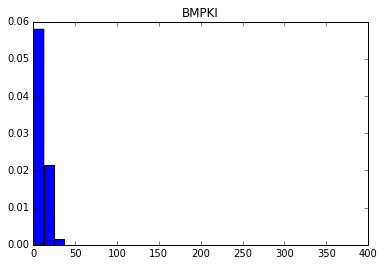

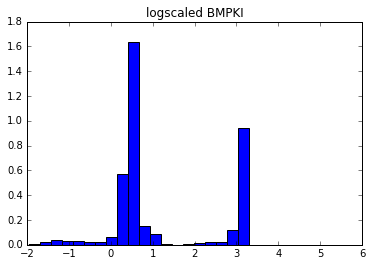

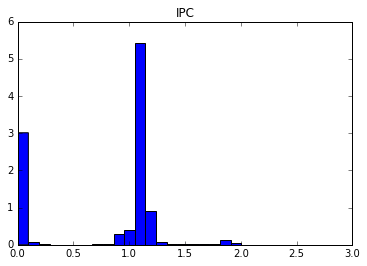

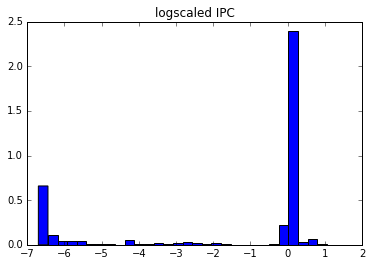

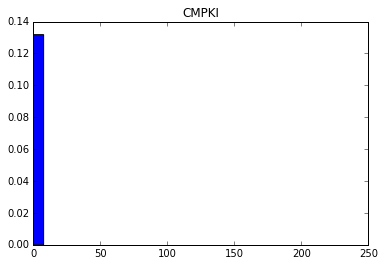

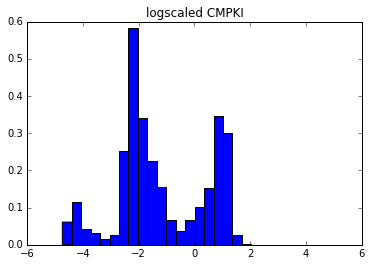

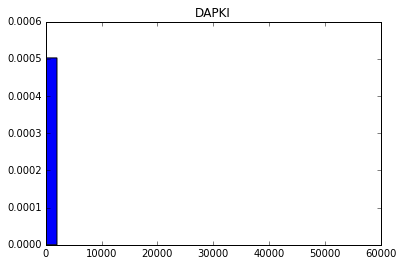

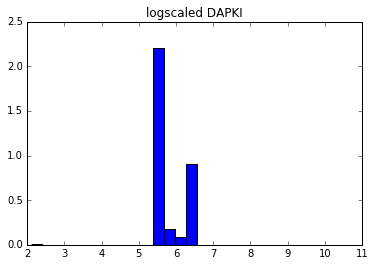

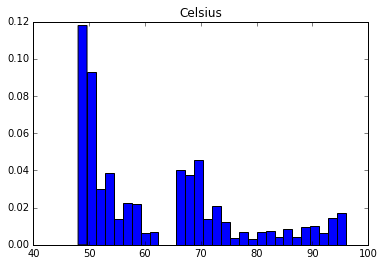

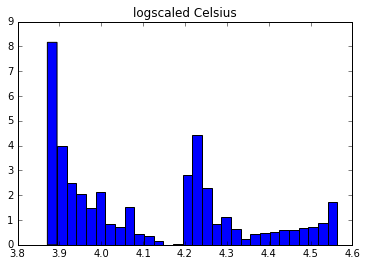

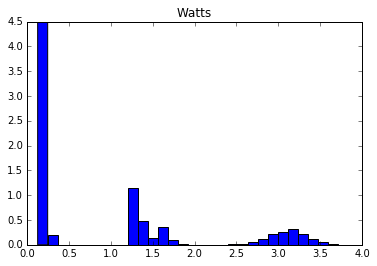

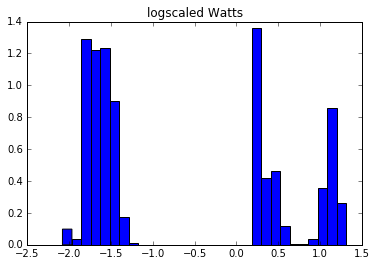

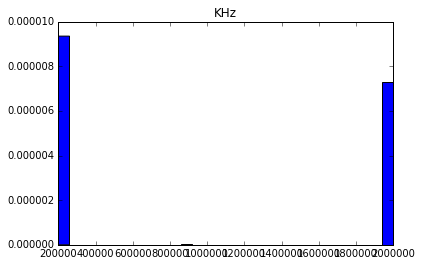

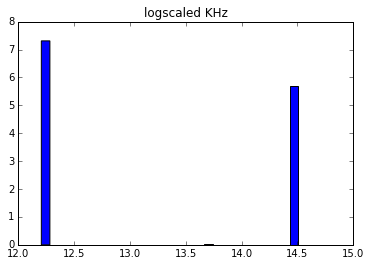

In [8]:
nbins=30
for col in data.columns:
    stat = np.array(data.loc[:,col])
    logstat = np.log(stat)
    
    plt.figure()
    plt.hist(stat, normed=True, log=False, bins=nbins)
#     plt.yscale('log')
    plt.title(col)
    plt.show()
    
    plt.figure()
    plt.hist(logstat, normed=True, log=False, bins=nbins)
    plt.title("logscaled {}".format(col))
    plt.show()

## Place collected 